In [ ]:
!pip install numpy as np
!pip install scipy
!pip install scikit-learn
!pip install matplotlib
!pip install pandas as pd

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Connect the Colab notebook to Google Drive, where all my files are kept
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
abalone_ds = pd.read_csv('/content/abalone.csv')

In [ ]:
X = abalone_ds.drop(columns=['15'] )
y = abalone_ds['15']

In [ ]:
# Initialize empty lists and dictionaries to store results
null_y_train_average = []
null_y_test_average = []

train_mse_list_ols = []
test_mse_list_ols = []
train_r2_list_ols = []
test_r2_list_ols = []

train_mse_list_regressor = []
test_mse_list_regressor = []
train_r2_list_regressor = []
test_r2_list_regressor = []

lambda_reg = 0.0001

# Initialize dictionaries to store results for decision tree regressor and random forest
decision_regressor_train_mse_list = {1: [], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[]}
decision_regressor_test_mse_list = {1: [], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[]}
decision_regressor_train_r2_list = {1: [], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[]}
decision_regressor_test_r2_list = {1: [], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[]}
decision_regressor_depth_list  = []

random_forest_mse_train = {10: [], 30: [], 100: [], 300: []}
random_forest_mse_test = {10: [], 30: [], 100: [], 300: []}
random_forest_r2_train = {10: [], 30: [], 100: [], 300: []}
random_forest_r2_test = {10: [], 30: [], 100: [], 300: []}

# Loop through the data 20 times
for i in range(20):
    # Initialize lists to store results for each random forest iteration
    forest_regressor_train_mse_list = []
    forest_regressor_test_mse_list = []
    forest_regressor_train_r2_list = []
    forest_regressor_test_r2_list = []

    number_of_trees = [10, 30, 100, 300]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=random.randint(1,999))

    # Calculate the average of the training labels
    y_average = np.mean(y_train)

    # Create null model predictions
    null_train_preds = np.full(y_train.shape, y_average)
    null_test_preds = np.full(y_test.shape, y_average)

    # Append null model average predictions to lists
    null_y_train_average.append(y_average * y_train.shape[0])
    null_y_test_average.append(y_average * y_test.shape[0])

    # Perform Ordinary Least Squares (OLS) regression
    X_train_const_ols = np.column_stack([np.ones(X_train.shape[0]), X_train])
    X_test_const_ols = np.column_stack([np.ones(X_test.shape[0]), X_test])
    I = np.eye(X_train_const_ols.shape[1])
    I[0, 0] = 0
    theta_ols = np.linalg.inv(X_train_const_ols.T.dot(X_train_const_ols) + lambda_reg * I).dot(X_train_const_ols.T).dot(y_train)

    # Calculate OLS predictions and metrics
    train_pred_ols = X_train_const_ols.dot(theta_ols)
    test_pred_ols = X_test_const_ols.dot(theta_ols)

    train_mse_list_ols.append(mean_squared_error(y_train, train_pred_ols))
    test_mse_list_ols.append(mean_squared_error(y_test, test_pred_ols))
    train_r2_list_ols.append(r2_score(y_train, train_pred_ols))
    test_r2_list_ols.append(r2_score(y_test, test_pred_ols))

    # Loop through different numbers of trees for Random Forest
    for tree_number in number_of_trees:
        model = RandomForestRegressor(n_estimators=tree_number, random_state=i)
        model.fit(X_train, y_train)
        y_train_predictions = model.predict(X_train)
        y_test_predictions = model.predict(X_test)
        mse_train = mean_squared_error(y_train, y_train_predictions)
        mse_test = mean_squared_error(y_test, y_test_predictions)
        r2_train = r2_score(y_train, y_train_predictions)
        r2_test = r2_score(y_test, y_test_predictions)

        # Append results to dictionaries for Random Forest
        random_forest_mse_train[tree_number].append(mse_train)
        random_forest_mse_test[tree_number].append(mse_test)
        random_forest_r2_train[tree_number].append(r2_train)
        random_forest_r2_test[tree_number].append(r2_test)

    # Loop through different tree depths for Decision Tree Regressor
    for tree_depth in range(1, 8):
        tree_reg = DecisionTreeRegressor(max_depth=tree_depth)
        tree_reg.fit(X_train, y_train)
        train_pred_tree = tree_reg.predict(X_train)
        test_pred_tree = tree_reg.predict(X_test)

        # Append results to lists and dictionaries for Decision Tree Regressor
        decision_regressor_depth_list.append(tree_depth)
        decision_regressor_train_mse_list[tree_depth].append(mean_squared_error(y_train, train_pred_tree))
        decision_regressor_test_mse_list[tree_depth].append(mean_squared_error(y_test, test_pred_tree))
        decision_regressor_train_r2_list[tree_depth].append(r2_score(y_train, train_pred_tree))
        decision_regressor_test_r2_list[tree_depth].append(r2_score(y_test, test_pred_tree))

# Calculate average metrics for Decision Tree Regressor at each tree depth
train_mse_means = []
test_mse_means = []
train_r2_means = []
test_r2_means = []

for tree_depth in range(1, 8):
    train_mse_mean = np.mean(decision_regressor_train_mse_list[tree_depth])
    test_mse_mean = np.mean(decision_regressor_test_mse_list[tree_depth])
    train_r2_mean = np.mean(decision_regressor_train_r2_list[tree_depth])
    test_r2_mean = np.mean(decision_regressor_test_r2_list[tree_depth])

    # Append the means to the respective lists
    train_mse_means.append(train_mse_mean)
    test_mse_means.append(test_mse_mean)
    train_r2_means.append(train_r2_mean)
    test_r2_means.append(test_r2_mean)

In [ ]:
null_values_train = []
null_values_test = []
y_train_bar = np.mean(y_train)
for i in range(20):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=random.randint(1,999))
  y_train_pred = np.full(shape=y_train.shape, fill_value=y_train_bar)
  y_test_pred = np.full(shape=y_test.shape, fill_value=y_train_bar)
  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  null_values_train.append(train_mse)
  null_values_test.append(test_mse)

print(f"NULL MODEL TRAINING MSE AVERAGE:{np.mean(null_values_train)}")
print(f"NULL MODEL TESTING MSE AVERAGE:{np.mean(null_values_test)}")


NULL MODEL TRAINING MSE AVERAGE:10.378040842050204
NULL MODEL TESTING MSE AVERAGE:10.451942539341282


In [ ]:

ols_mse_mean = sum(train_mse_list_ols)/len(train_mse_list_ols)
ols_r2_mean = sum(train_r2_list_ols)/len(train_r2_list_ols)

ols_mse_mean_test = sum(test_mse_list_ols)/len(test_mse_list_ols)
ols_r2_mean_test = sum(train_r2_list_ols)/len(train_r2_list_ols)

print(f"OLS TRAINING MSE AVERAGE: {ols_mse_mean}")
print(f"OLS TEST MSE AVERAGE: {ols_mse_mean_test}")
print(f"OLS TRAINING R2 AVERAGE: {ols_r2_mean}")
print(f"OLS TEST R2 AVERAGE: {ols_r2_mean_test}")




OLS TRAINING MSE AVERAGE: 4.875176068515533
OLS TEST MSE AVERAGE: 5.088469592570585
OLS TRAINING R2 AVERAGE: 0.5302926926120348
OLS TEST R2 AVERAGE: 0.5302926926120348


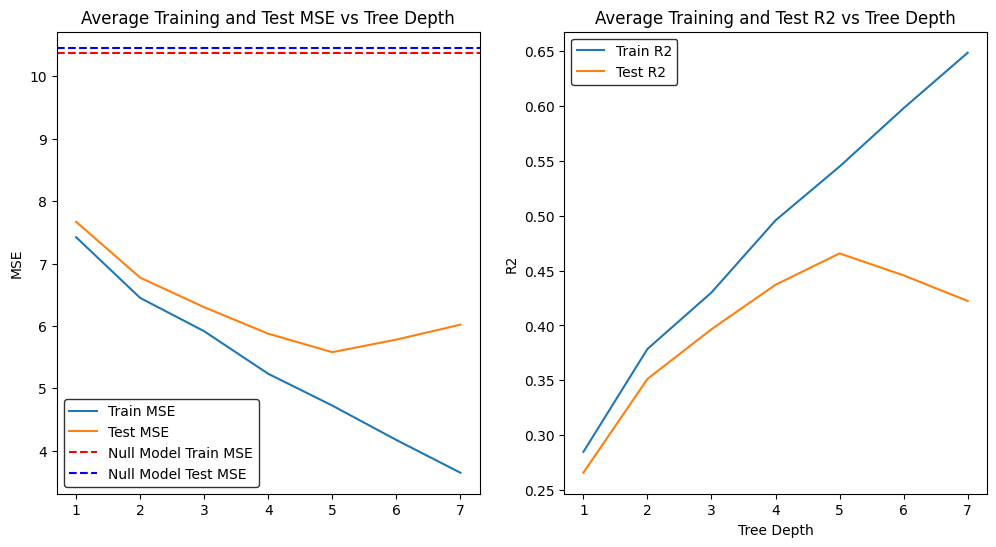

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Initialize dictionaries to store results for decision tree regressor
depths = 7  # Number of tree depths
decision_regressor_train_mse_list = {i: [] for i in range(1, depths + 1)}
decision_regressor_test_mse_list = {i: [] for i in range(1, depths + 1)}
decision_regressor_train_r2_list = {i: [] for i in range(1, depths + 1)}
decision_regressor_test_r2_list = {i: [] for i in range(1, depths + 1)}

# Loop through data 20 times
for i in range(20):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=random.randint(1, 999))

    # Loop through different tree depths for Decision Tree Regressor
    for tree_depth in range(1, depths + 1):
        tree_reg = DecisionTreeRegressor(max_depth=tree_depth)
        tree_reg.fit(X_train, y_train)
        train_pred_tree = tree_reg.predict(X_train)
        test_pred_tree = tree_reg.predict(X_test)

        # Append results to lists and dictionaries for Decision Tree Regressor
        decision_regressor_train_mse_list[tree_depth].append(mean_squared_error(y_train, train_pred_tree))
        decision_regressor_test_mse_list[tree_depth].append(mean_squared_error(y_test, test_pred_tree))
        decision_regressor_train_r2_list[tree_depth].append(r2_score(y_train, train_pred_tree))
        decision_regressor_test_r2_list[tree_depth].append(r2_score(y_test, test_pred_tree))

# Calculate means
train_mse_means = [np.mean(decision_regressor_train_mse_list[i]) for i in range(1, depths + 1)]
test_mse_means = [np.mean(decision_regressor_test_mse_list[i]) for i in range(1, depths + 1)]
train_r2_means = [np.mean(decision_regressor_train_r2_list[i]) for i in range(1, depths + 1)]
test_r2_means = [np.mean(decision_regressor_test_r2_list[i]) for i in range(1, depths + 1)]

# Create plots to visualize results
plt.figure(figsize=(12, 6))

# First subplot for MSE values
plt.subplot(1, 2, 1)
plt.plot(range(1, depths + 1), train_mse_means, label='Train MSE')
plt.plot(range(1, depths + 1), test_mse_means, label='Test MSE')
plt.axhline(np.mean(null_values_train), color='red', linestyle='--', label='Null Model Train MSE')
plt.axhline(np.mean(null_values_test), color='blue', linestyle='--', label='Null Model Test MSE')
plt.ylabel('MSE')
plt.title('Average Training and Test MSE vs Tree Depth')
plt.legend(frameon=True, edgecolor='black')

plt.subplot(1, 2, 2)
plt.plot(range(1, depths + 1), train_r2_means, label='Train R2')
plt.plot(range(1, depths + 1), test_r2_means, label='Test R2')
plt.xlabel('Tree Depth')
plt.ylabel('R2')
plt.title('Average Training and Test R2 vs Tree Depth')
plt.legend(frameon=True, edgecolor='black')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Initialize dictionaries to store results for random forest
random_forest_mse_train = {10: [], 30: [], 100: [], 300: []}
random_forest_mse_test = {10: [], 30: [], 100: [], 300: []}
random_forest_r2_train = {10: [], 30: [], 100: [], 300: []}
random_forest_r2_test = {10: [], 30: [], 100: [], 300: []}

# Loop through the data 20 times
for i in range(20):
    number_of_trees = [10, 30, 100, 300]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=np.random.randint(1, 999))

    # Loop through different numbers of trees for Random Forest
    for tree_number in number_of_trees:
        model = RandomForestRegressor(n_estimators=tree_number, random_state=i)
        model.fit(X_train, y_train)
        y_train_predictions = model.predict(X_train)
        y_test_predictions = model.predict(X_test)
        mse_train = mean_squared_error(y_train, y_train_predictions)
        mse_test = mean_squared_error(y_test, y_test_predictions)
        r2_train = r2_score(y_train, y_train_predictions)
        r2_test = r2_score(y_test, y_test_predictions)

        # Append results to dictionaries for Random Forest
        random_forest_mse_train[tree_number].append(mse_train)
        random_forest_mse_test[tree_number].append(mse_test)
        random_forest_r2_train[tree_number].append(r2_train)
        random_forest_r2_test[tree_number].append(r2_test)

# Calculate the overall mean R2 and MSE for each number of trees
overall_mean_r2_train = {k: np.mean(v) for k, v in random_forest_r2_train.items()}
overall_mean_r2_test = {k: np.mean(v) for k, v in random_forest_r2_test.items()}
overall_mean_mse_train = {k: np.mean(v) for k, v in random_forest_mse_train.items()}
overall_mean_mse_test = {k: np.mean(v) for k, v in random_forest_mse_test.items()}

# Print the overall mean results
for trees in number_of_trees:
    print(f"Number of Trees: {trees}")
    print(f"Overall Mean Training R2: {overall_mean_r2_train[trees]:.4f}")
    print(f"Overall Mean Test R2: {overall_mean_r2_test[trees]:.4f}")
    print(f"Overall Mean Training MSE: {overall_mean_mse_train[trees]:.4f}")
    print(f"Overall Mean Test MSE: {overall_mean_mse_test[trees]:.4f}")
    print()


Number of Trees: 10
Overall Mean Training R2: 0.9108
Overall Mean Test R2: 0.5078
Overall Mean Training MSE: 0.9228
Overall Mean Test MSE: 5.2053

Number of Trees: 30
Overall Mean Training R2: 0.9285
Overall Mean Test R2: 0.5356
Overall Mean Training MSE: 0.7395
Overall Mean Test MSE: 4.9139

Number of Trees: 100
Overall Mean Training R2: 0.9350
Overall Mean Test R2: 0.5450
Overall Mean Training MSE: 0.6729
Overall Mean Test MSE: 4.8136

Number of Trees: 300
Overall Mean Training R2: 0.9367
Overall Mean Test R2: 0.5472
Overall Mean Training MSE: 0.6547
Overall Mean Test MSE: 4.7898



In [ ]:
total_overall_mean_r2_train = np.mean(list(overall_mean_r2_train.values()))
total_overall_mean_r2_test = np.mean(list(overall_mean_r2_test.values()))
total_overall_mean_mse_train = np.mean(list(overall_mean_mse_train.values()))
total_overall_mean_mse_test = np.mean(list(overall_mean_mse_test.values()))

print(f"Total Overall Mean Training R2: {total_overall_mean_r2_train:.4f}")
print(f"Total Overall Mean Test R2: {total_overall_mean_r2_test:.4f}")
print(f"Total Overall Mean Training MSE: {total_overall_mean_mse_train:.4f}")
print(f"Total Overall Mean Test MSE: {total_overall_mean_mse_test:.4f}")


Total Overall Mean Training R2: 0.9278
Total Overall Mean Test R2: 0.5339
Total Overall Mean Training MSE: 0.7475
Total Overall Mean Test MSE: 4.9307
